The example below illustrates on how to calculate the cartesian/spherical cordinates on a blochsphere from a given 2d statevector 

In [1]:
# in this step, we will generate a 2 dim random statevector using quantum_info random_statevector method
from qiskit.quantum_info import random_statevector, Statevector

rand_sv  = random_statevector(2).data
print(rand_sv)  # print the vector components (complex amplitudes) associated with bais |0> and |1> from rand_sv


[-0.14104984-0.55224761j  0.07220894+0.81848237j]


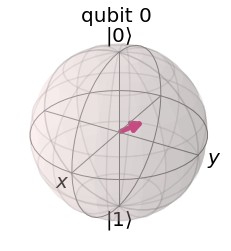

In [2]:
#Lets plot the rand_sv using plot_bloch_multivector, before that import plot_bloch vector from qiskit.visualization 
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(rand_sv)

In order to calcualte cartesian coordinates, let's first calculate the spherical coordinates 'theta'(θ) and 'phi'(φ), for Bloch Sphere the spherical coordinates are (r, θ, φ). since the he radius of bloch sphere is 1, r = 1 and theta is the angle our state make with Z axis (polar angle) and  phi is the angle between the projection of state on XY plane makes with X axis(also called the azimuthal angle) 

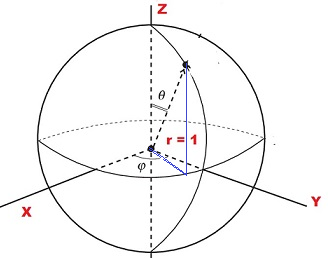


On bloch sphere a two dimensonal state vector |ψ⟩  is represented with the following relation between θ and φ, and 
once we calculate theta and phi, we can calculate the cartesian cordinates with below relation

X = r*sin(θ)cos(φ),   
Y = r*sin(θ)sin(φ),   
Z = r*cos(θ) 



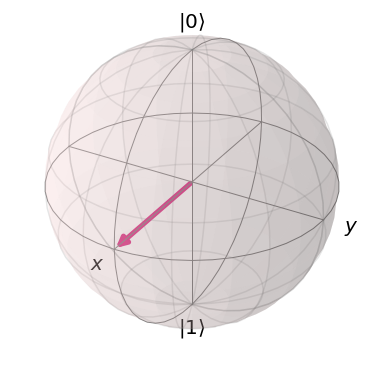

In [3]:
# once we will have the cartesian cordinates calculated we can use plot_bloch_vector from visualization as shown below
from qiskit.visualization import plot_bloch_vector
plot_bloch_vector([1,0,0])

The random statevector represent the qubit state in following form
                            |ψ⟩ = α|0⟩ + β|1⟩ , where α, β are complex numbers. 

Let's convert and write complex numbers α and β in polar form in above equation
                            |ψ⟩ = (r_α)e^i(φa)|0⟩ + (r_β)e^i(φb)|1⟩

In this form there are four variables two real numbers and two imaginaries. We can multiply above equation by 
e^i(-φa) on both side to get another equivalent equation where state is only differ by a global phase. 
        
                        e^i(-φa)|ψ⟩ = (r_α)|0⟩ + (r_β)e^i(φb-φa)|1⟩
                            =>  |ψ⟩ = (r_α)|0⟩ + (r_β)e^(iφ)|1⟩    ignore global phase and 'φ = φb-φa' phase differnce

since we only care about the phase difference and that is how Blochsphere is setup, we can ignore the global phase and 
get down to just three variables in above equation.

On converting the complex amplitude associated with state |1⟩ in cartesian form, we can re-write state |ψ⟩ as :

                                |ψ⟩ = (r_α)|0⟩ + (x+iy)|1⟩ , 

In summary all below equations are equal


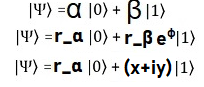

Let's code this

In [8]:
# break down complex amplitudes α and β in real and imaginary parts to express same in polar form. 
import math
import numpy as np

print('The random statevector', rand_sv)
alpha_real = rand_sv[0].real
alpha_imag = rand_sv[0].imag
alpha_theta = math.atan(alpha_imag/alpha_real) 

if alpha_real < 0 and alpha_imag > 0 :
    alpha_theta = math.atan(alpha_imag/alpha_real) + math.pi

if alpha_real < 0 and alpha_imag < 0 :
    alpha_theta = math.atan(alpha_imag/alpha_real) + math.pi

print ('alpha and alpha_theta ', np.around(alpha_real,8), np.around(alpha_imag,8), math.degrees(alpha_theta))
r_alpha = math.sqrt((alpha_real**2) + (alpha_imag**2))

beta_real = rand_sv[1].real
beta_imag = rand_sv[1].imag
beta_theta = math.atan(beta_imag/beta_real) 

if beta_real < 0 and beta_imag > 0 :
    beta_theta = math.atan(beta_imag/beta_real) + math.pi

if beta_real < 0 and beta_imag < 0 :
    beta_theta = math.atan(beta_imag/beta_real) + math.pi

print ('beta and beta_theta ', np.around(beta_real,8), np.around(beta_imag,8), math.degrees(beta_theta))

r_beta = math.sqrt((beta_real**2) + (beta_imag**2))

# use global phase to get a real only value for amplitude associated with state |0> on bloch sphere
phi = beta_theta - alpha_theta
print('r_alpha, r_beta, Phase differnce phi: ',phi)




The random statevector [-0.14104984-0.55224761j  0.07220894+0.81848237j]
alpha and alpha_theta  -0.14104984 -0.55224761 255.67236622913242
beta and beta_theta  0.07220894 0.81848237 84.95824994524077
r_alpha, r_beta, Phase differnce phi:  -2.979523408786376


With the rand_sv vector transformed to |ψ⟩ = (r_α)|0⟩ + (x+iy)|1⟩, the normalization constraints gives an equation of sphere

            (r_α)^2 + x^2 + y^2  = 1           This is an equation of unit sphere with radius = 1 
    
so we can replace r = 1 in cartesian, polar relation below 
x = r*sin(θ)cos(φ) = sin(θ)cos(φ),   
y = r*sin(θ)sin(φ) = sin(θ)sin(φ),   
z = r*cos(θ)       = cos(θ)                      

going back to the polar representation:

                                  |ψ⟩ = (r_α)|0⟩ + r_βe^iφ|1⟩
           same can be written as |ψ⟩ = cos(θ) |0⟩ + e^iφsin(θ)|1⟩

we notice that all the unique values of |ψ⟩ get be obtained by simply varying theta from 0 to π/2 and φ from 0 to 2π   (upper hemisphere of Bloch sphere) and opposite point on the Bloch sphere are only different by a global phase of -1, we can make an adjustment and map all possible unique states of |ψ⟩ by just varying theta from 0 to π/2, it can be done by  dividing the real angle θ on sphere by 2 (θ' = θ/2) and that way the opposite ends on the sphere will represent two orthogonal states. There be obtain the new state |ψ⟩ as  

                        |ψ⟩ = cos(θ') |0⟩ + e^(iφ)sin(θ') |1⟩  θ' = 0 to π/2 and φ = 0 to 2π maps all the points  

                        |ψ⟩ = α|0⟩ + β|1⟩  where   θ' = θ/2,  α = cos(θ/2),  β = e^(iφ)sin(θ/2)

                        we can get the value of theta and phi from below relations 
                        θ/2 = arccos(α) and φ = φb-φa


In [9]:
theta = 2 * np.arccos(r_alpha)
print('Spherical Coordinates of Blochsphere are theta and phi : 1, ', theta, beta_theta - alpha_theta)
x = math.sin(theta)*math.cos(phi)
y = math.sin(theta)*math.sin(phi)
z = math.cos(theta)
print(x,y,z)

Spherical Coordinates of Blochsphere are theta and phi : 1,  1.9286397033061904 -2.979523408786376
-0.9243799839413649 -0.15113918505684226 -0.35025503854893436


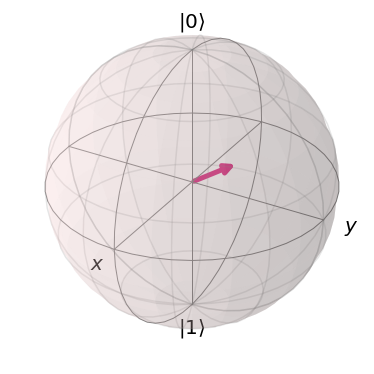

In [10]:
plot_bloch_vector([x,y,z])
#plot_bloch_vector([1, theta, phi], coord_type='spherical')  # also try it out with spherical coordinates

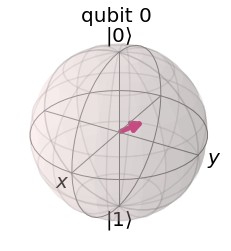

In [11]:
#once agian we plot rand_sv state to check if that is same as what we have calculated above
plot_bloch_multivector(rand_sv)